# Data structures

The main data structures of Fusion Toolbox are: `FramePointCloud`, `PointCloud` and `SurfelCloud`.

They'll be demonstrate using the `sample2` dataset.

In [1]:
from fiontb.data.ftb import load_ftb

dataset = load_ftb("../../test-data/rgbd/sample2")
frame = dataset[0]

## `FramePointCloud`

A point cloud with its point arraged as its source image. This is useful representation for retriving 3d points if the search points can be projected into 2D images.

In [2]:
from fiontb.frame import FramePointCloud
fpcl = FramePointCloud.from_frame(frame)

print("`.points` shape: {fpcl.points.shape} and dtype: {fpcl.points.dtype}".format(fpcl=fpcl))
print("`.mask` shape: {fpcl.mask.shape} and dtype: {fpcl.mask.dtype}".format(fpcl=fpcl))
print("`.colors` shape: {fpcl.colors.shape} and dtype: {fpcl.colors.dtype}".format(fpcl=fpcl))
print("`.normals` shape: {fpcl.normals.shape} and dtype: {fpcl.normals.dtype}".format(fpcl=fpcl))

`.points` shape: torch.Size([480, 640, 3]) and dtype: torch.float32
`.mask` shape: torch.Size([480, 640]) and dtype: torch.bool
`.colors` shape: torch.Size([480, 640, 3]) and dtype: torch.uint8
`.normals` shape: torch.Size([480, 640, 3]) and dtype: torch.float32


 The `geoshow` can interactively display 3D geometries.

In [3]:
from fiontb.viz import geoshow
geoshow([fpcl], title="FramePointCloud", invert_y=True)

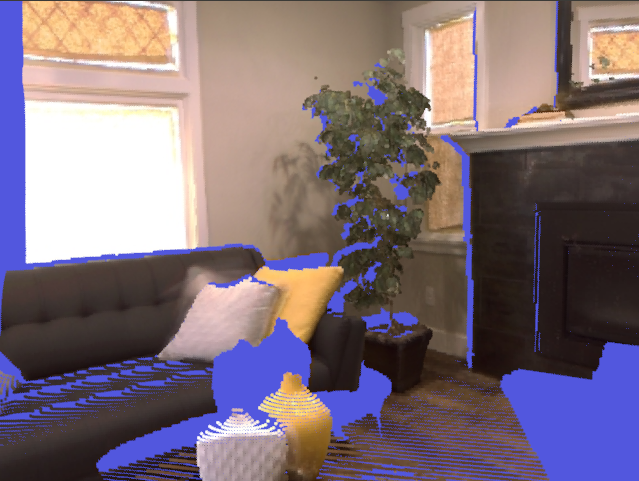

## `PointCloud`

A classic point cloud with no specific ordering of its points

In [4]:
from fiontb.pointcloud import PointCloud

pcl, selected_mask = PointCloud.from_frame(frame)

print("`.points` shape: {pcl.points.shape} and dtype: {pcl.points.dtype}".format(pcl=pcl))
print("`.colors` shape: {pcl.colors.shape} and dtype: {pcl.colors.dtype}".format(pcl=pcl))
print("`.normals` shape: {pcl.normals.shape} and dtype: {pcl.normals.dtype}".format(pcl=pcl))

`.points` shape: torch.Size([307200, 3]) and dtype: torch.float32
`.colors` shape: torch.Size([307200, 3]) and dtype: torch.uint8
`.normals` shape: torch.Size([307200, 3]) and dtype: torch.float32


The second return from `PointCloud.from_frame` (`selected_mask`) contains a 2D mask with which pixel are included in the PCL.

In [5]:
pcl = fpcl.unordered_point_cloud(world_space=True)
print(pcl)

In [6]:
geoshow([fpcl], title="PointCloud", invert_y=True)

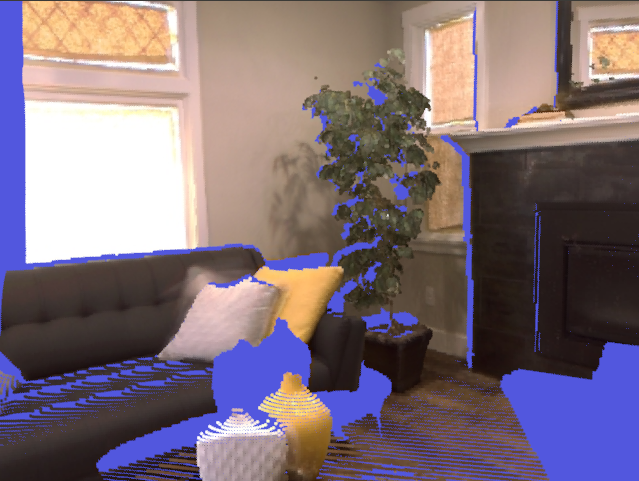

## `SurfelCloud`

"Surfels are glorified point clouds". Besides the common point cloud attributes, surfels also have radius and a confidence scale number.

In [7]:
from fiontb.surfel import SurfelCloud
scl = SurfelCloud.from_frame(frame)
print("`.points` shape: {scl.points.shape} and dtype: {scl.points.dtype}".format(scl=scl))
print("`.colors` shape: {scl.colors.shape} and dtype: {scl.colors.dtype}".format(scl=scl))
print("`.normals` shape: {scl.normals.shape} and dtype: {scl.normals.dtype}".format(scl=scl))
print("`.radii` shape: {scl.radii.shape} and dtype: {scl.radii.dtype}".format(scl=scl))
print("`.confidences` shape: {scl.confidences.shape} and dtype: {scl.confidences.dtype}".format(scl=scl))

`.points` shape: torch.Size([307200, 3]) and dtype: torch.float32
`.colors` shape: torch.Size([307200, 3]) and dtype: torch.uint8
`.normals` shape: torch.Size([307200, 3]) and dtype: torch.float32
`.radii` shape: torch.Size([307200]) and dtype: torch.float32
`.confidences` shape: torch.Size([307200]) and dtype: torch.float32


In [8]:
geoshow([scl], title="SurfelCloud", invert_y=True)

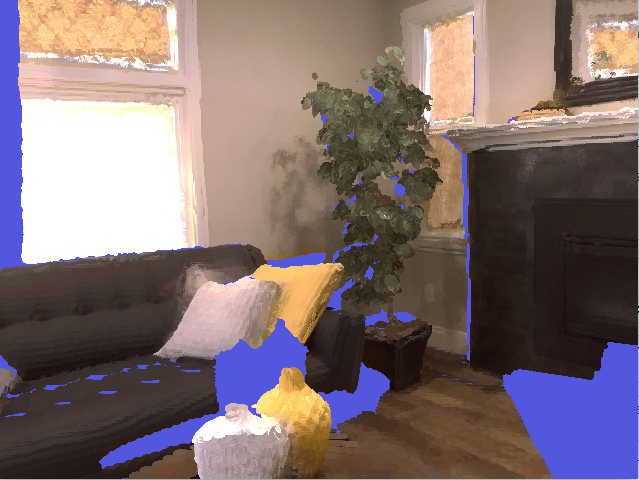